## UCLA model trained on the UCLA dataset without visual attributes evaluation

In [1]:
import sys
sys.path.append("../../venv/lib/python3.6/site-packages/")
sys.path.append("..")

In [2]:
import os
import pandas as pd
from lib import analysis_utils as au
import matplotlib.pyplot as plt
import scipy
import numpy as np

/home/jesper/tmp/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load the data

In [3]:
pred_dir = "models_preds"
# file_name = "UCLA_model_UCLA_dataset_without_visual_attributes_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300.csv"
file_name = 'fully_con_reduced_transform_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300.csv'
preds = pd.read_csv(os.path.join(pred_dir, file_name))
        
print ("loaded ", len(preds), " rows")

loaded  8143  rows


In [4]:
preds

,imageHASH,name,violence,protest,pred_protest,pred_violence
0,64adf672a10584f0,train-15308.jpg,0.415880,True,9.937132e-01,0.403324
1,f829656d1b626745,train-02503.jpg,-1.000000,False,1.299812e-04,0.140942
2,6b591513796f7731,train-28781.jpg,-1.000000,False,8.303839e-08,0.067362
3,d71c3e5ecada3534,test-06509.jpg,0.162512,True,9.707690e-01,0.178976
4,0c2025072e683709,train-25059.jpg,-1.000000,False,4.464934e-02,0.308561
5,6cc88caca4ac8cd8,train-01609.jpg,-1.000000,False,2.720563e-03,0.146608
6,70848d9e4e5c787c,train-12047.jpg,0.302167,True,9.999946e-01,0.274059
7,5c23f4bc9e76961a,train-00863.jpg,-1.000000,False,2.989983e-03,0.198909
8,354dcf313c36382e,train-09578.jpg,0.241548,True,9.662064e-01,0.218164
9,a49c9e1e16bef4b8,train-21940.jpg,-1.000000,False,7.017954e-05,0.131750


### Protest

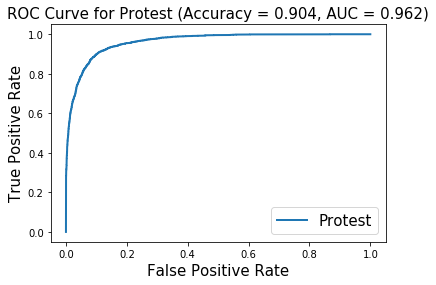

In [5]:
au.plotROC("protest", preds["protest"], preds["pred_protest"])

### Violence

Text(0.5,1,'violence (Correlation = 0.889, R_squared = 0.789 )')

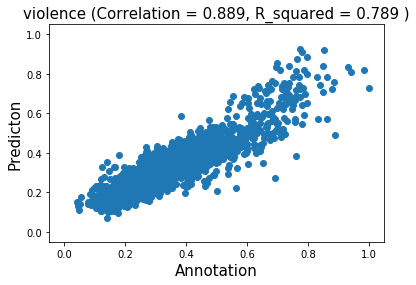

In [6]:

# remove masked values from test set
non_masked_violence_true = preds[preds["violence"] != - 1]["violence"]
non_masked_violence_preds = preds[preds["violence"] != - 1]["pred_violence"]

fig, ax = plt.subplots()
plt.scatter(non_masked_violence_true, non_masked_violence_preds, label = "violence")
plt.xlim([-.05,1.05])
plt.ylim([-.05,1.05])
plt.xlabel('Annotation', fontsize = 15)
plt.ylabel('Predicton', fontsize = 15)
corr, pval = scipy.stats.pearsonr(non_masked_violence_true, non_masked_violence_preds)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(non_masked_violence_true,non_masked_violence_preds)
r_squared = r_value ** 2
plt.title(('{attr} (Correlation = {corr:.3f}, R_squared = {r_2:.3f} )'
            .format(attr = "violence", corr= corr, r_2 = r_squared)), fontsize = 15)
